# Outline

This notebook provides:
* an extended abstract,
* a description of a game,
* an analysis of the data available


## Extended abstract

I want to understand the effect of certain sentiments in communication on the performance of a team. Being rude to a team or just one member can change the mood of the team, which in turn could deteriorate the way the team works. As people are social creatures and spend a significant amount of time performing a job, where a team are colleagues and performance is KPI, it is important to understand whether social behavior has an impact on team performance.

However, it is difficult to get the data on all the communication between team members and quantify the performance. That is why I am going to focus on the Dota 2, a multiplayer online battle arena (MOBA) video game. Firstly, in this game people, communicate and accomplish tasks in a team, which is similar to the work environment. Due to the recent pandemic, remote jobs are getting popular and workers shift to using chats instead of verbal communication. This makes communication in work teams look more similar to the one in Dota 2. Moreover, performance in the game is clearly quantifiable.

I will use the dataset parsed from Opendota, an open-source platform, containing 50,000 matches played between November 6 and November 18 of 2015. The dataset contains three sources of information that I use: (1) match outcome data, which includes the start time, duration, and the outcome of the match; (2) player data, which includes gold, experience, last hits, kills, deaths, and assists for each hero in a match; (3) chat data, which includes all messages sent to a chat. Using this dataset I found out that there are on average 29 messages per game, more than 4 people (out of 10) text 88% of the time, and 7% of the time players are toxic in the first half of the game.

I split each game into equal parts by duration. I want to analyze whether being toxic in the first part of the game will contribute to losing the game. 

RESULTS

DISCUSSION


**self notes**
how many players of each team wrote per game

## Description of a game
Dota 2 is played in matches between two teams of five players, with each team occupying and defending their own separate base on the map. Each of the ten players independently controls a powerful character known as a "hero" that all have unique abilities and differing styles of play. During a match players collect experience points (XP) and buy items (with gold) for their heroes to successfully defeat the opposing team's heroes in player versus player combat. A team wins by being the first to destroy the other team's "Ancient", a large structure located within their base. Ancients are located in the left bottom and right upper corners. 

<img src=https://i.imgur.com/iqE4fxr.png width="700">

To destroy the ancient players need XP to level up a hero and gold to buy inventory. For any kill, a hero gains XP and gold. There are three types of characters a player can kill: 
1. creeps, 
2. neutrals, 
3. other heroes. 

Creeps are non-player characters (NPC) that regularly march from each team's Ancient towards the other Ancient. Creeps march only by lanes (top, mid, bottom) and they are considered to be pawns of each team. Usually heroes help friendly creeps to kill the enemy creeps. 

Neutral creeps are NPCs that appear in the jungle. Unlike creeps, they are not playing for any team (hence, the name neutral) and don't move unless get attacked. Heroes can "switch" from lanes to the jungle and kill neutral creeps.

Heroes are human players. There is a total of 10 heroes (10 players), 5 for each team. Sometimes, when several heroes from the opposing teams meet they can decide to fight and get gold and XP. If a hero dies, it appears 

Overall, players are either killing creeps on lanes, killing neutrals in jungle, or killing heroes. This strategy lasts until one of the team gains enough gold and XP to destroy the ancient.

## Analysis of the data available

In [170]:
import pandas as pd
import numpy as np

In [9]:
# teamfights data for each player 
tf_player = pd.read_csv('../Data/Original/teamfights_players.csv')

# teamfights timings
tf = pd.read_csv('../Data/Original/teamfights.csv')

# player info for each minute
player_time = pd.read_csv('../Data/Original/player_time.csv')

# chat data
chat = pd.read_csv('../Data/Original/chat.csv')

# player ratings
player_ratings = pd.read_csv('../Data/Original/player_ratings.csv')

# player info for the match
player = pd.read_csv('../Data/Original/players.csv')

# match information
match = pd.read_csv('../Data/Original/match.csv')

# account id info  
match_outcomes = pd.read_csv('../Data/Original/match_outcomes.csv')

### Information about matches

In [11]:
match.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


Let's depict the histogram for the duration of matches 

In [12]:
match['duration_min'] = match['duration']/60 

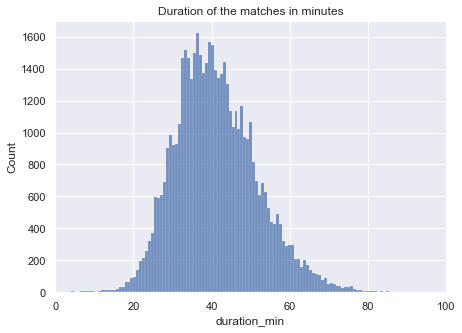

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(7, 5)})
fig, ax = plt.subplots()
sns.histplot(match.duration_min).set_title('Duration of the matches in minutes')
ax.set_xlim(0,100)
#ax.set_xticks(range(0,100))
plt.show()

As we can see, the duration of a match ranges from 30 to 50 minutes 

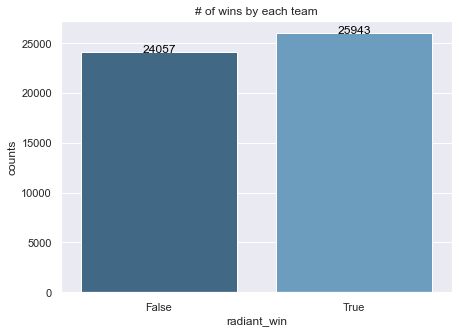

In [49]:
groupedvalues=match.groupby(['radiant_win']).size().reset_index(name='counts')

pal = sns.color_palette("Blues_d", len(groupedvalues))
rank = groupedvalues["counts"].argsort().argsort() 
g=sns.barplot(x='radiant_win',y='counts',data=groupedvalues, palette=np.array(pal[::-1])[rank])
g.set_title('# of wins by each team')
for index, row in groupedvalues.iterrows():
    g.text(row.name, row.counts, round(row.counts,2), color='black', ha="center")

Out of 50,000 matches, the probability of winning is almost 50%

### Information about chat messages

In [50]:
chat.head()

,match_id,key,slot,time,unit
0,0,force it,6,-8,6k Slayer
1,0,space created,1,5,Monkey
2,0,hah,1,6,Monkey
3,0,ez 500,6,9,6k Slayer
4,0,mvp ulti,4,934,Kira


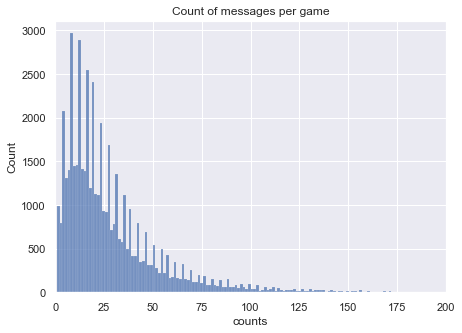

In [58]:
grouped_chat = chat.groupby(['match_id']).size().reset_index(name='counts')

fig, ax = plt.subplots()
sns.histplot(chat.groupby(['match_id']).size().reset_index(name='counts').counts).set_title('Count of messages per game')
ax.set_xlim(0,200)
#ax.set_xticks(range(0,100))
plt.show()

In [59]:
chat.groupby(['match_id']).size().reset_index(name='counts').counts.describe()

count    49772.000000
mean        28.921643
std         27.334633
min          1.000000
25%         12.000000
50%         21.000000
75%         37.000000
max        449.000000
Name: counts, dtype: float64

About 1000 games have no messages. On average, there are 29 messages per game.

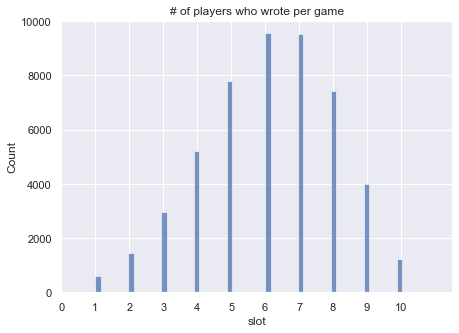

In [131]:
grouped_chat = chat.groupby(['match_id','slot']).size().reset_index(name='counts')
fig, ax = plt.subplots()
sns.histplot(grouped_chat.groupby('match_id').slot.nunique()).set_title('# of players who wrote per game')
ax.set_xticks(range(0,11))
plt.show()

In about 88% of the games, there are 4+ players who text something in game chats.

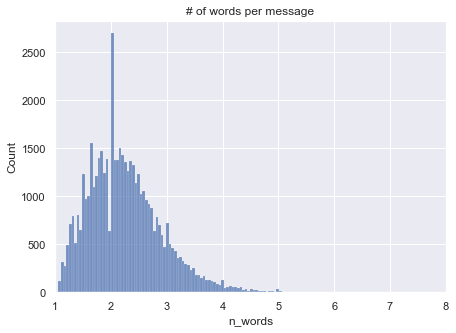

In [102]:
chat['n_words'] = chat['key'].str.split().str.len()
fig, ax = plt.subplots()
sns.histplot(chat.groupby(['match_id']).n_words.mean()).set_title('# of words per message')
ax.set_xlim(1,8)
plt.show()

On average, there are 1.5-2.5 words per message

### Information about chat messages after preprocessing
Let's do the preprocessing and analyze how the situation changes

In [68]:
import os
import re
import nltk
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer 

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings("ignore")

In [69]:
# load the stopword list provided by the NLTK library
stop_words = stopwords.words('english')

In [70]:
def preprocessing_text(text):
    text = re.sub(r'[^A-Za-z0-9 ]+', ' ', text) #remove all non‐alphanumeric characters except white space
    text = re.sub("(.)\\1{2,}", "\\1", text) #replace 3+ consecutive letters to 1 (loooovvvve -> love)
    text = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", text) # remove emails
    text = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , text) # remove urls
    words = word_tokenize(text.lower())
    tokens = [word for word in words if word not in stop_words]
    tokens = [token for token in tokens if not any(c.isdigit() for c in token)] #remove everything containing digits
    lemmatizer = WordNetLemmatizer()
    tokens_lematized = [lemmatizer.lemmatize(word) for word in tokens]
    tokens_lematized = [word for word in tokens_lematized if word not in stop_words]    
    preprocessed_text = ' '.join(tokens_lematized)
    return preprocessed_text

In [91]:
%%time
chat['text_prepr'] = chat['key'].apply(lambda x: preprocessing_text(str(x)))

Wall time: 2min 4s


Create chat2, which removes rows with empty messages. E.g. if someone text "200", by preprocessing it will become empty. That's why I get rid of this row

In [111]:
chat2 = chat[chat.text_prepr != ""]
chat2.head()

,match_id,key,slot,time,unit,text_prepr,n_words
0,0,force it,6,-8,6k Slayer,force,2.0
1,0,space created,1,5,Monkey,space created,2.0
2,0,hah,1,6,Monkey,hah,1.0
3,0,ez 500,6,9,6k Slayer,ez,2.0
4,0,mvp ulti,4,934,Kira,mvp ulti,2.0


In [114]:
len(chat2)/len(chat)

0.8547115363240263

I got rid of 15% of messages

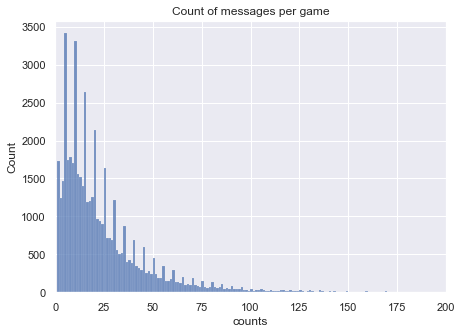

In [116]:
fig, ax = plt.subplots()
sns.histplot(chat2.groupby(['match_id']).text_prepr.size().reset_index(name='counts').counts).set_title('Count of messages per game')
ax.set_xlim(0,200)
#ax.set_xticks(range(0,100))
plt.show()

In [117]:
chat2.groupby(['match_id']).size().reset_index(name='counts').counts.describe()

count    49540.000000
mean        24.835426
std         24.764190
min          1.000000
25%          9.000000
50%         18.000000
75%         32.000000
max        433.000000
Name: counts, dtype: float64

About 1700 games have no messages now. On average, there are 25 messages per game.

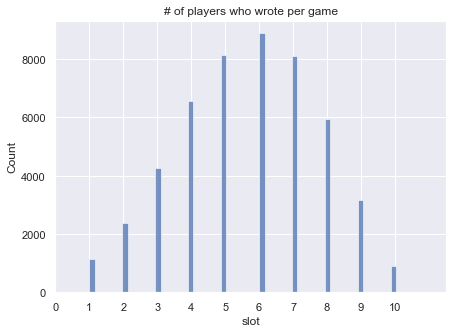

In [130]:
grouped_chat2 = chat2.groupby(['match_id','slot']).size().reset_index(name='counts')
fig, ax = plt.subplots()
sns.histplot(grouped_chat2.groupby('match_id').slot.nunique()).set_title('# of players who wrote per game')
ax.set_xticks(range(0,11))
plt.show()

In about 80% of the games, there are 4+ players who text something in game chats.

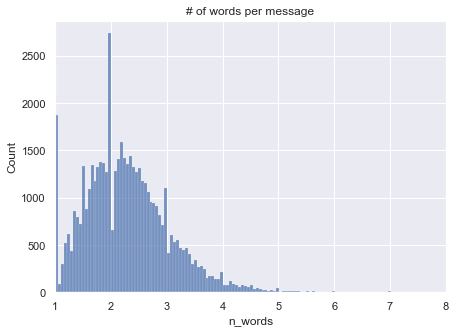

In [133]:
chat2['n_words'] = chat2['key'].str.split().str.len()
fig, ax = plt.subplots()
sns.histplot(chat2.groupby(['match_id']).n_words.mean()).set_title('# of words per message')
ax.set_xlim(1,8)
plt.show()

In [135]:
chat2.groupby(['match_id']).n_words.mean().describe()

count    49540.000000
mean         2.288253
std          0.765995
min          1.000000
25%          1.750000
50%          2.200000
75%          2.722222
max         13.097015
Name: n_words, dtype: float64

### Split data by the first and second half
First, add the total duration of a match to chat df

In [147]:
chat2 = chat2.merge(match[['match_id', 'duration']], on='match_id', how='left')

In [151]:
# create a column dummy which identifies whether the message was sent in the first half
chat2['first_half'] = chat2['time']/chat2['duration']
chat2['first_half'] = np.where(chat2['first_half']< 0.5, 1, 0)

In [154]:
# combine all messages into one string 
chat2 = chat2.groupby(['match_id', 'first_half', 'slot'])['text_prepr'].apply(' '.join).reset_index()

### Predict toxicity

In [158]:
import pickle
# load model
model = pickle.load(open('./toxic_classifier/log_model.pkl', 'rb'))

In [159]:
with open("./toxic_classifier/comment_data.pkl", "rb") as fp:   # Unpickling
    df = pickle.load(fp)

In [160]:
vectorizer = TfidfVectorizer() 
tfidf = vectorizer.fit_transform(df.comment_text)

In [161]:
def get_pred(s):
    x = []
    x.append(s)
   # x[0] = preprocessing_text(x[0])
    vec = vectorizer.transform(x)
    label = model.predict(vec)[0]
    return label

In [164]:
%%time
chat2['toxic'] = chat['text_prepr'].apply(lambda x: get_pred(x))

Wall time: 1h 3min 39s


In [169]:
#chat2.to_csv('../Data/Modified/chat_half_pred.csv')

If considering only the first half of the game, 15,890 out of 232,603 players are being toxic, that is about 7% of the time.

In [175]:
chat2.groupby(['first_half', 'toxic']).toxic.count()

first_half  toxic
0           0        232603
            1         15890
1           0        109299
            1          7313
Name: toxic, dtype: int64

## Doing regressions

In [183]:
chat2 = chat2[chat2.first_half==0]
chat2

,match_id,first_half,slot,text_prepr,toxic
0,0,0,0,fuck ka bu slayer haha,0
1,0,0,1,hah wtf ta u srsly alyway hit l hah hah hah ha...,0
2,0,0,2,lol really,0
3,0,0,6,bye fate cruel sad spec cape weahaha wahaha sp...,0
4,0,0,7,wat one cant even run everyone kiting u stand ...,0
...,...,...,...,...,...
365097,49999,0,3,wait medusa fuck wait tuskar,0
365098,49999,0,5,g punch man,0
365099,49999,0,6,ggwp,0
365100,49999,0,7,end time noob bo hahahaha,0


In [185]:
chat3 = chat2.pivot(index='match_id', columns='slot', values='toxic')

In [196]:
chat3.reset_index(inplace=True)

In [204]:
chat_rad = chat3[['match_id',0,1,2,3,4]]
chat_dir = chat3[['match_id',5,6,7,8,9]]

In [209]:
chat_rad['no_text'] = chat_rad.isnull().sum(axis=1)

In [215]:
chat_rad = chat_rad.fillna(0)
chat_rad['n_toxic'] = chat_rad[0]+chat_rad[1]+chat_rad[2]+chat_rad[3]+chat_rad[4]

In [235]:
chat_rad['team'] = 'radiant'

In [230]:
chat_dir['no_text'] = chat_dir.isnull().sum(axis=1)
chat_dir = chat_dir.fillna(0)

KeyError: 6

In [232]:
chat_dir['n_toxic'] = chat_dir[5]+chat_dir[6]+chat_dir[7]+chat_dir[8]+chat_dir[9]

In [248]:
chat_dir['team'] = 'dire'
chat_dir = chat_dir.rename(columns={5: 0, 6: 1, 7: 2, 8: 3, 9: 4})

In [250]:
frames = [chat_rad, chat_dir]
chat4 = pd.concat(frames)

In [252]:
chat4['is_radiant'] = np.where(chat4['team']== 'radiant', 1, 0)

In [256]:
chat5 = pd.merge(chat4, match[['match_id','radiant_win']] , how='left', left_on=['match_id'], right_on = ['match_id'])

In [262]:
chat5['win'] = np.where(chat4['team']== 'radiant', chat5.radiant_win, abs(chat5.radiant_win-1))

In [263]:
chat5

,match_id,0,1,2,3,4,no_text,n_toxic,team,is_radiant,radiant_win,win
0,0,0.0,0.0,0.0,0.0,0.0,2,0.0,radiant,1,True,1
1,1,0.0,1.0,0.0,1.0,0.0,1,2.0,radiant,1,False,0
2,2,0.0,0.0,0.0,0.0,0.0,3,0.0,radiant,1,False,0
3,3,0.0,0.0,0.0,0.0,0.0,3,0.0,radiant,1,False,0
4,4,0.0,0.0,0.0,0.0,0.0,3,0.0,radiant,1,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
98387,49994,0.0,0.0,0.0,0.0,0.0,1,0.0,dire,0,False,1
98388,49995,0.0,0.0,0.0,0.0,0.0,3,0.0,dire,0,True,0
98389,49996,0.0,0.0,0.0,0.0,0.0,4,0.0,dire,0,True,0
98390,49998,0.0,0.0,0.0,0.0,0.0,1,0.0,dire,0,True,0


In [265]:
chat5[['n_toxic','win']].corr()

,n_toxic,win
n_toxic,1.000000,0.045743
win,0.045743,1.000000


In [266]:
import statsmodels.formula.api as smf

mod = smf.ols('win ~ n_toxic + no_text', data=chat5)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    win   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3126.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:14:25   Log-Likelihood:                -68381.
No. Observations:               98392   AIC:                         1.368e+05
Df Residuals:                   98389   BIC:                         1.368e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7263      0.003    210.515      0.0

In [181]:
match

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster,duration_min
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155,39.583333
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154,43.033333
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132,45.266667
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191,51.416667
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156,31.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1447829192,3025,1824,0,0,63,117,22,True,0,0,111,50.416667
49996,49996,1447829181,1451,1982,384,48,63,147,22,True,0,0,204,24.183333
49997,49997,1447829197,2672,1830,0,0,63,130,22,True,0,0,111,44.533333
49998,49998,1447829189,2211,1982,4,3,63,645,22,True,0,0,151,36.850000


In [168]:
chat2

,match_id,first_half,slot,text_prepr,toxic
0,0,0,0,fuck ka bu slayer haha,0
1,0,0,1,hah wtf ta u srsly alyway hit l hah hah hah ha...,0
2,0,0,2,lol really,0
3,0,0,6,bye fate cruel sad spec cape weahaha wahaha sp...,0
4,0,0,7,wat one cant even run everyone kiting u stand ...,0
...,...,...,...,...,...
365100,49999,0,7,end time noob bo hahahaha,0
365101,49999,0,8,noob happu def noob ez ez ez ez ez ez ez ez ez...,0
365102,49999,1,3,g medusa,0
365103,49999,1,7,hahaha,0


In [162]:
chat2

,match_id,first_half,slot,text_prepr
0,0,0,0,fuck ka bu slayer haha
1,0,0,1,hah wtf ta u srsly alyway hit l hah hah hah ha...
2,0,0,2,lol really
3,0,0,6,bye fate cruel sad spec cape weahaha wahaha sp...
4,0,0,7,wat one cant even run everyone kiting u stand ...
...,...,...,...,...
365100,49999,0,7,end time noob bo hahahaha
365101,49999,0,8,noob happu def noob ez ez ez ez ez ez ez ez ez...
365102,49999,1,3,g medusa
365103,49999,1,7,hahaha


### Add a start column to tf_player dataframe

In [5]:
# create empty 
tf_player["start"] = ""

# event_times for games
event_times = tf.start

In [6]:
def n_times(v,n):
    for i in range(n):
        yield v

event_times = [i for j in event_times for i in n_times(j,10)]

In [7]:
tf_player["start"] = np.array(event_times)

In [8]:
tf_player['radiant'] = np.where(tf_player['player_slot']<= 5, 1, 0)

### Get sum of gold by each team

In [9]:
x = tf_player.groupby(['match_id', 'start', 'radiant']).sum()['gold_delta']

In [10]:
radiant_gold = x.loc[:,:,1]
dire_gold = x.loc[:,:,0]

In [11]:
tf['radiant_gold'] = np.array(radiant_gold)
tf['dire_gold'] = np.array(dire_gold)

In [12]:
tf['delta_gold'] = tf['radiant_gold'] - tf['dire_gold']

In [13]:
tf.head()

,match_id,start,end,last_death,deaths,radiant_gold,dire_gold,delta_gold
0,0,220,252,237,3,632,790,-158
1,0,429,475,460,3,1929,345,1584
2,0,900,936,921,3,3145,-506,3651
3,0,1284,1328,1313,3,1872,-112,1984
4,0,1614,1666,1651,5,1768,2164,-396


### Add player in-game characteristics to the tf

In [14]:
# round start time by minute
tf['times'] = (tf.start//60)*60
tf['times']= np.where(tf['times']< 0, 0, tf['times'])

In [15]:
tf2 = pd.merge(tf, player_time,  how='left', left_on=['match_id','times'], right_on = ['match_id','times'])

In [16]:
tf2.head()

,match_id,start,end,last_death,deaths,radiant_gold,dire_gold,delta_gold,times,gold_t_0,...,xp_t_129,gold_t_130,lh_t_130,xp_t_130,gold_t_131,lh_t_131,xp_t_131,gold_t_132,lh_t_132,xp_t_132
0,0,220,252,237,3,632,790,-158,180,683,...,842,958,16,1135,300,0,210,1290,8,527
1,0,429,475,460,3,1929,345,1584,420,1257,...,2033,2652,47,3111,700,0,241,3033,28,1329
2,0,900,936,921,3,3145,-506,3651,900,3324,...,4472,6534,114,7788,1767,6,1486,6470,60,3822
3,0,1284,1328,1313,3,1872,-112,1984,1260,5019,...,5583,8777,147,9713,2606,8,1929,9637,87,6372
4,0,1614,1666,1651,5,1768,2164,-396,1560,6394,...,6892,11091,171,12333,3678,15,3392,12017,108,8150


### Add chat to tf2

In [17]:
# change slot accordingly
chat.loc[chat['slot'] ==5 , 'slot'] = 128
chat.loc[chat['slot'] ==6 , 'slot'] = 129
chat.loc[chat['slot'] ==7 , 'slot'] = 130
chat.loc[chat['slot'] ==8 , 'slot'] = 131
chat.loc[chat['slot'] ==9 , 'slot'] = 132

In [18]:
for i in range(50000):
    start = tf2[tf2.match_id == i]['start'].to_list()
    for k in range(len(start)):
        chat.loc[(chat['match_id']==i)& (chat['time']<start[len(start)-k-1]), 'start'] = start[len(start)-k-1]

KeyboardInterrupt: 

### Only first 20,000 games

In [ ]:
chat = chat[chat.match_id<20000]

In [ ]:
chat = chat.dropna()

In [ ]:
chat = chat.groupby(['match_id', 'start', 'slot'])['key'].apply(' '.join).reset_index()

In [ ]:
chat.head()

### Predict toxicity

In [ ]:
import pickle

In [ ]:
# load model
model = pickle.load(open('../toxic_classifier/log_model.pkl', 'rb'))

In [ ]:
import os
import re
import nltk
import string
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer 

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load the stopword list provided by the NLTK library
stop_words = stopwords.words('english')

In [ ]:
def preprocessing_text(text):
    text = re.sub(r'[^A-Za-z0-9 ]+', ' ', text) #remove all non‐alphanumeric characters except white space
    text = re.sub("(.)\\1{2,}", "\\1", text) #replace 3+ consecutive letters to 1 (loooovvvve -> love)
    text = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", text) # remove emails
    text = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , text) # remove urls
    words = word_tokenize(text.lower())
    tokens = [word for word in words if word not in stop_words]
    tokens = [token for token in tokens if not any(c.isdigit() for c in token)] #remove everything containing digits
    lemmatizer = WordNetLemmatizer()
    tokens_lematized = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens_lematized)
    return preprocessed_text

In [ ]:
with open("../toxic_classifier/comment_data.pkl", "rb") as fp:   # Unpickling
    df = pickle.load(fp)

In [ ]:
vectorizer = TfidfVectorizer() 
tfidf = vectorizer.fit_transform(df.comment_text)

In [ ]:
def get_pred(s):
    x = []
    x.append(s)
    x[0] = preprocessing_text(x[0])
    vec = vectorizer.transform(x)
    label = model.predict(vec)[0]
    return label

In [ ]:
chat['toxic'] = chat['key'].apply(lambda x: get_pred(x))

In [ ]:
chat

In [ ]:
chat

In [ ]:
chat.pivot(columns='slot', values=['key'])

In [ ]:
chat

In [ ]:
chat[chat.match_id==19999]

In [ ]:
chat.to_csv('../../Data/Modified/chat_modified_v1.csv')

In [ ]:
chat.loc[(chat['match_id']==0)& (chat['time']<start[len(start)-0-1]), 'start'] = start[len(start)-0-1]

In [ ]:
tf2[tf2.match_id == 1000]

In [ ]:
chat[chat.match_id==20000]

In [ ]:
start = tf2[tf2.match_id == 0]['start']

In [ ]:
start[0]

In [ ]:
chat

In [ ]:
chat.loc[(chat['match_id']==0)& (chat['time']<start[len(start)-0]), 'start'] = start[len(start)-0]

In [ ]:
start

In [ ]:
start[0]

In [ ]:
start[len(start)-1]

In [ ]:
for k in range(len(start)):
    print(start[len(start)-1-k])

In [ ]:
chat

In [ ]:
for i in range()

In [ ]:
chat[chat.match_id == 0]

In [ ]:
chat.slot.unique()

In [ ]:
chat[chat['slot']==-9]

In [ ]:
chat.at[652287,'slot']=3

In [ ]:
chat[chat.match_id == 22654]

In [ ]:
player_time

In [ ]:
for i in columns_to_create:
    tf[i] = ""
    for k in range(len(tf)):
        tf.loc[k,i] = player_time.loc[player_time['match_id'] == tf.loc[k].match_id, ('times','lh_t_1')].loc[player_time['times'] == tf.loc[k].times, 'lh_t_1'].iloc[0]


In [ ]:
tf.loc[k].times

In [ ]:
tf.loc[k].match_id

In [ ]:
tf.loc[0,i] = 2

In [ ]:
tf.loc[tf['A'] > 2, 'B'] = new_val

In [ ]:
i

In [ ]:
tf[tf.match_id == 23]

In [ ]:
tf.times.unique()

In [ ]:
player_time.times.unique()

In [ ]:
player_time[player_time.match_id==23]

In [ ]:
tf

In [ ]:
tf.loc[0].i = player_time.loc[player_time['match_id'] == tf.loc[k].match_id, ('times','lh_t_1')].loc[player_time['times'] == tf.loc[k].times, 'lh_t_1'].iloc[0]

In [ ]:
player_time.loc[player_time['match_id'] == tf.loc[k].match_id, ('times','lh_t_1')].loc[player_time['times'] == tf.loc[k].times, 'lh_t_1'].iloc[0]

In [ ]:
tf.loc[0][i]

In [ ]:
tf

In [ ]:
event_times

In [ ]:
player_time.loc[player_time['match_id'] == 0, ('times','lh_t_1')].loc[player_time['times'] == 120, 'lh_t_1'].iloc[0]

In [ ]:
player_time.loc[idx]['lh_t_0']

In [ ]:
idx = player_time.index[(player_time.match_id ==0) & (player_time.times == 60)].tolist()[0]

In [ ]:
player_time

In [ ]:
event_times

In [ ]:
list(player_time.columns)

In [ ]:
for i in range(n_observations):
    # event_times for game i
    event_times = tf[tf.match_id == i].start
    
    # for each event_time, 
    for k in range(len(event_times)):
        for j in range(10):
            tf_player.at[10*k + j,'start'] = event_times.iloc[k]

In [ ]:
event_times = tf[tf.match_id == 3].start

In [ ]:
event_times = tf.start
len(event_times)

In [ ]:
len(tf_player)

In [ ]:
x = tf[tf.match_id == 0]
y = x.start
y

In [ ]:
tf_player.head()

In [ ]:
tf_player.groupby(['match_id', 'start']).mean()

In [ ]:
tf_player.at[0,'start']=10

In [ ]:
set_value?df.at[4, 'B']